In [1]:
import os.path

import numpy as np
import xarray as xr

from xcube_smos.dgg import SmosDiscreteGlobalGrid
from xcube_smos.l2prod import SmosMappedL2Product

The SMOS discrete global grid. Installed by SNAP SMOS-Box in "~/.snap/auxdata":

In [2]:
dgg_path = os.path.expanduser("~/.snap/auxdata/smos-dgg/grid-tiles")

Path for a sample SMOS Level-2 product

In [3]:
l2_product_path = "../testdata/SM_OPER_MIR_SMUDP2_20220405T182911_20220405T192224_700_001_1.nc"

---

In [4]:
dgg = SmosDiscreteGlobalGrid(dgg_path)

In [5]:
dgg_ds_0 = dgg.get_dataset(0)

In [6]:
dgg_ds_0

<xarray.Dataset>
Dimensions:  (lat: 8064, lon: 16384)
Coordinates:
  * lat      (lat) float64 88.58 88.56 88.54 88.52 ... -88.54 -88.56 -88.58
  * lon      (lon) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 180.0 180.0
Data variables:
    seqnum   (lat, lon) uint32 dask.array<chunksize=(504, 512), meta=np.ndarray>

In [7]:
dgg_ds_0.seqnum

<xarray.DataArray 'seqnum' (lat: 8064, lon: 16384)>
dask.array<open_dataset-86399c2f2ff316f6909ca637ee8f60a9seqnum, shape=(8064, 16384), dtype=uint32, chunksize=(504, 512), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 88.58 88.56 88.54 88.52 ... -88.54 -88.56 -88.58
  * lon      (lon) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 180.0 180.0

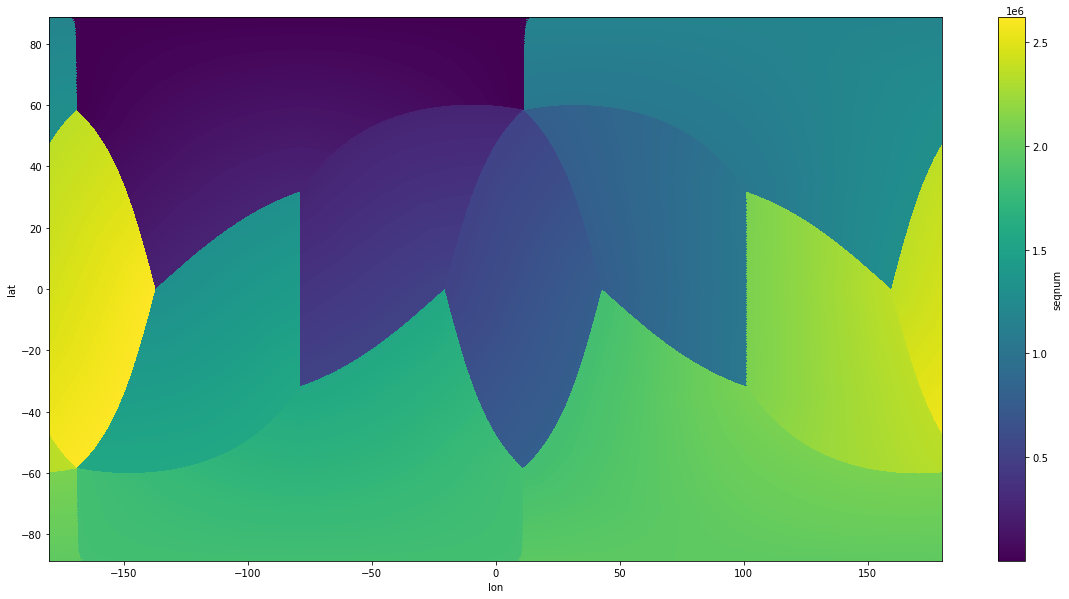

In [8]:
dgg_ds_0.seqnum.plot.imshow(figsize=(20, 10))

---

In [9]:
mapped_l2 = SmosMappedL2Product.open(l2_product_path, dgg)

In [10]:
l2_product = mapped_l2.l2_product
l2_product

<xarray.Dataset>
Dimensions:                      (n_grid_points: 80841)
Dimensions without coordinates: n_grid_points
Data variables: (12/72)
    Surface_Temperature_DQX      (n_grid_points) float32 ...
    Scattering_Albedo_H          (n_grid_points) float32 ...
    Dielect_Const_MD_IM_DQX      (n_grid_points) float32 ...
    Tau_Cur_DQX                  (n_grid_points) float32 ...
    M_AVA0                       (n_grid_points) uint16 ...
    DIFF_Albedos_DQX             (n_grid_points) float32 ...
    ...                           ...
    TB_TOA_Theta_B_V             (n_grid_points) float32 ...
    Seconds                      (n_grid_points) uint32 ...
    N_Point_Source_RFI           (n_grid_points) uint16 ...
    N_X_Band                     (n_grid_points) uint16 ...
    Altitude                     (n_grid_points) float32 ...
    Dielect_Const_MD_RE          (n_grid_points) float32 ...
Attributes: (12/397)
    creation_date:                                                           ...
    total_number_of_grid_points:                                             ...
    FH:File_Name:                                                            ...
    FH:File_Description:                                                     ...
    FH:Mission:                                                              ...
    FH:File_Class:                                                           ...
    ...                                                                                                                         ...
    VH:MPH:OI:Y_Position:                                                    ...
    VH:MPH:OI:Z_Position:                                                    ...
    VH:MPH:OI:X_Velocity:                                                    ...
    VH:MPH:OI:Y_Velocity:                                                    ...
    VH:MPH:OI:Z_Velocity:                                                    ...
    VH:MPH:OI:Vector_Source:                                                 ...

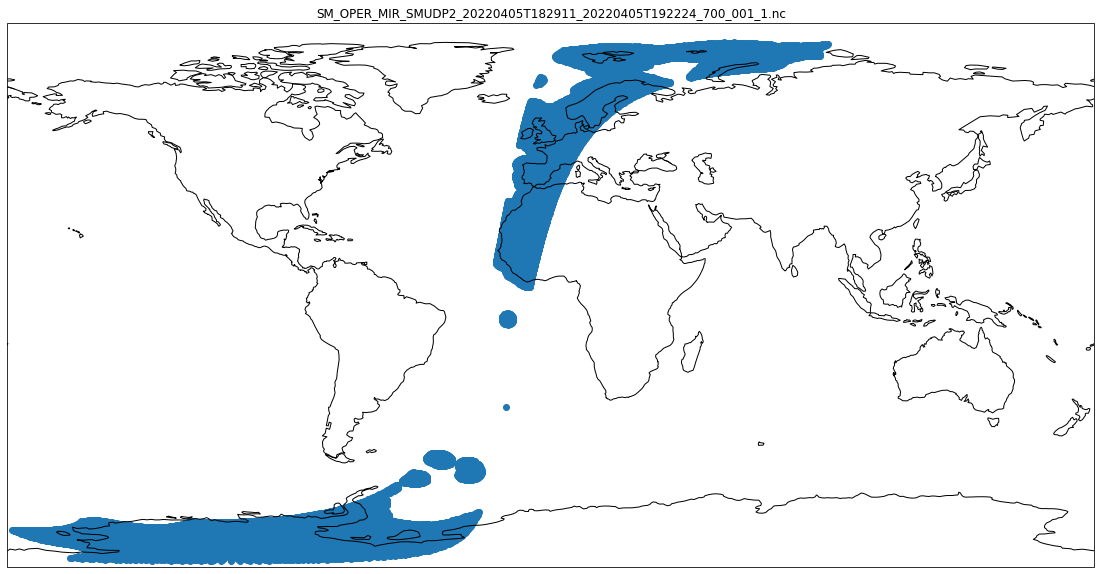

In [13]:
try:
    import cartopy.crs
    import matplotlib.pyplot as plt
    
    ax = plt.axes(projection=cartopy.crs.PlateCarree())
    plt.title(os.path.basename(l2_product_path))
    ax.set_extent([-180, 180, -90, 90], cartopy.crs.PlateCarree())
    ax.figure.set_size_inches(20, 10)
    ax.coastlines(resolution='110m')
    plt.scatter(l2_product.Longitude, l2_product.Latitude)
    plt.show()
except (ImportError, AttributeError) as e:
    display(e)

In [14]:
mapped_l2.l2_index

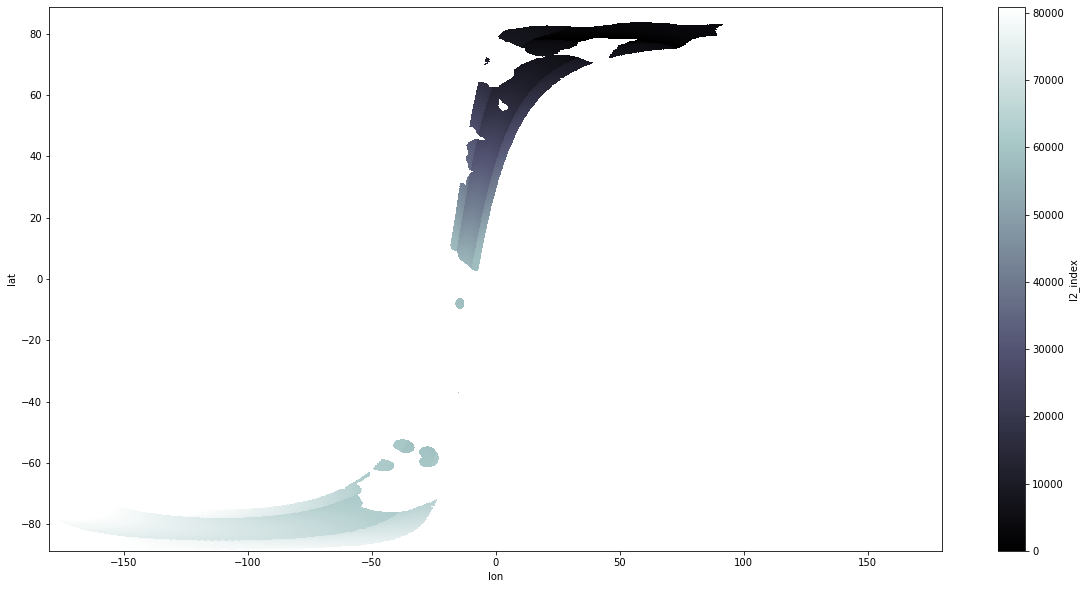

In [15]:
mapped_l2.l2_index.get_dataset(0).l2_index.plot.imshow(figsize=(20, 10), cmap="bone")

In [16]:
l2_ds_0 = mapped_l2.get_dataset(0)
l2_ds_0

<xarray.Dataset>
Dimensions:                      (lat: 8064, lon: 16384)
Coordinates:
  * lat                          (lat) float64 88.58 88.56 ... -88.56 -88.58
  * lon                          (lon) float64 -180.0 -180.0 ... 180.0 180.0
Data variables: (12/72)
    Surface_Temperature_DQX      (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    Scattering_Albedo_H          (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    Dielect_Const_MD_IM_DQX      (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    Tau_Cur_DQX                  (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    M_AVA0                       (lat, lon) uint16 dask.array<chunksize=(504, 512), meta=np.ndarray>
    DIFF_Albedos_DQX             (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    ...                           ...
    TB_TOA_Theta_B_V             (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    Seconds                      (lat, lon) uint32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    N_Point_Source_RFI           (lat, lon) uint16 dask.array<chunksize=(504, 512), meta=np.ndarray>
    N_X_Band                     (lat, lon) uint16 dask.array<chunksize=(504, 512), meta=np.ndarray>
    Altitude                     (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    Dielect_Const_MD_RE          (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
Attributes: (12/397)
    creation_date:                                                           ...
    total_number_of_grid_points:                                             ...
    FH:File_Name:                                                            ...
    FH:File_Description:                                                     ...
    FH:Mission:                                                              ...
    FH:File_Class:                                                           ...
    ...                                                                                                                         ...
    VH:MPH:OI:Y_Position:                                                    ...
    VH:MPH:OI:Z_Position:                                                    ...
    VH:MPH:OI:X_Velocity:                                                    ...
    VH:MPH:OI:Y_Velocity:                                                    ...
    VH:MPH:OI:Z_Velocity:                                                    ...
    VH:MPH:OI:Vector_Source:                                                 ...

In [17]:
l2_ds_0.Soil_Moisture

<xarray.DataArray 'Soil_Moisture' (lat: 8064, lon: 16384)>
dask.array<map_l2_values, shape=(8064, 16384), dtype=float32, chunksize=(504, 512), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 88.58 88.56 88.54 88.52 ... -88.54 -88.56 -88.58
  * lon      (lon) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 180.0 180.0
Attributes:
    units:       m3 m-3
    _FillValue:  -999.0

Because the underlying Level-2 product has been opened using `decode_cf=False`, the value -999 _is not_ turned into NaN:

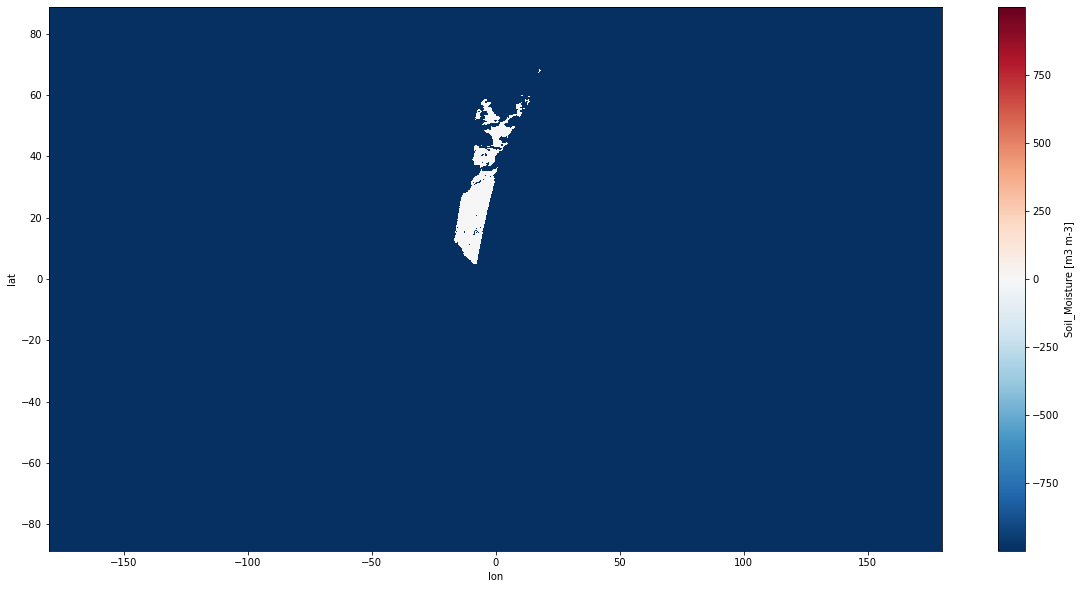

In [18]:
l2_ds_0.Soil_Moisture.plot.imshow(figsize=(20, 10))

Skip negative value by `vmin=0`:

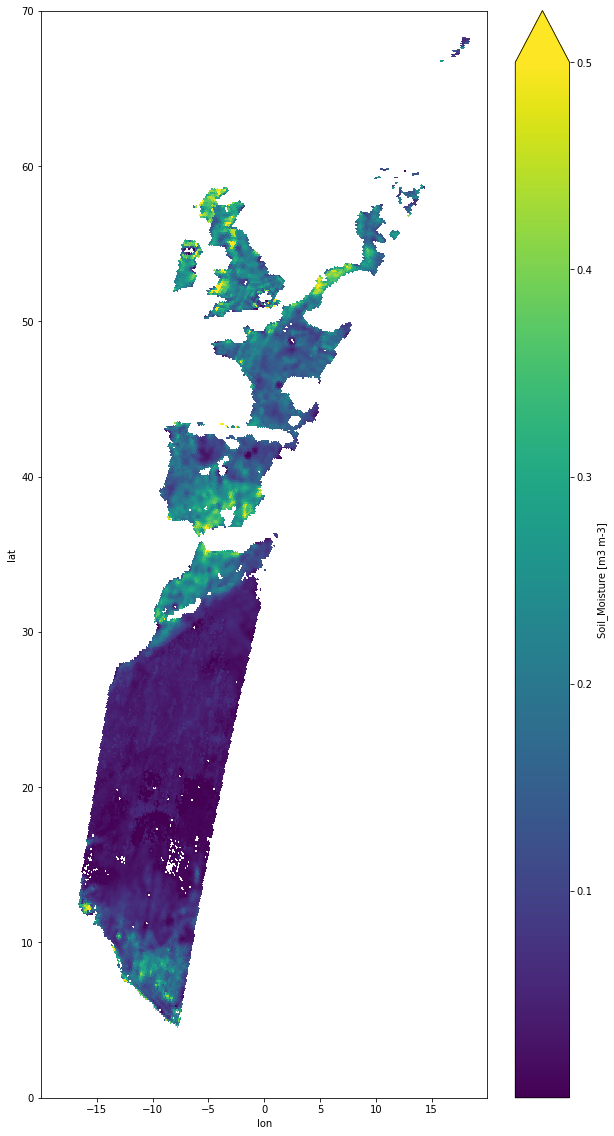

In [28]:
sm_subset = l2_ds_0.Soil_Moisture.sel(lon=slice(-20., 20.), lat=slice(70., 0.))
sm_subset.where(sm_subset != -999, np.nan).plot.imshow(figsize=(10, 20), vmax=0.5)

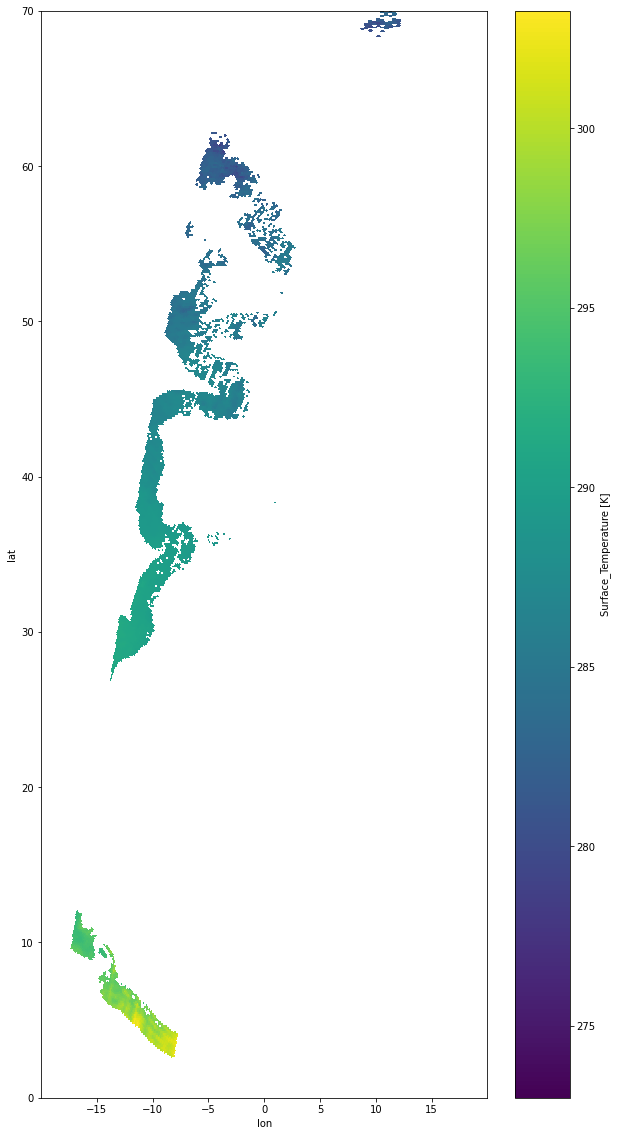

In [33]:
st_subset = l2_ds_0.Surface_Temperature.sel(lon=slice(-20., 20.), lat=slice(70., 0.))
st_subset.where(st_subset != -999, np.nan).plot.imshow(figsize=(10, 20), vmin=273)

---

Try writing as Zarr and skipping empty chunks:

In [20]:
import shutil
import json
import zarr
import dask.array as da
import numcodecs
import numpy as np

In [21]:
mapped_l2_zarr_path = os.path.splitext(l2_product_path)[0] + ".zarr"

In [22]:
shutil.rmtree(mapped_l2_zarr_path, ignore_errors=True)

In [ ]:
encodings = {
    var_name: {**var.encoding, "write_empty_chunks": False}
    for var_name, var in l2_ds_0.data_vars.items()
}

# The above doesn't work: 
# ValueError: unexpected encoding parameters for zarr backend:  ['write_empty_chunks']: 
encodings = None

#l2_ds_0.to_zarr(mapped_l2_zarr_path, mode="w", encoding=encodings)

Try writing "raw" Zarr

In [ ]:
os.mkdir(mapped_l2_zarr_path)

with open(f"{mapped_l2_zarr_path}/.zgroup", "w") as f:
    json.dump({"zarr_format": 2}, f)
with open(f"{mapped_l2_zarr_path}/.zattrs", "w") as f:
    json.dump({}, f)

for var_name, var in l2_ds_0.data_vars.items():
    display(f"Writing {var_name}")
    da.to_zarr(
        var.data, 
        f"{mapped_l2_zarr_path}/{var_name}",
        write_empty_chunks=False,
        fill_value=var.attrs.get("_FillValue"),
        compressor=numcodecs.Blosc(),
    )

In [ ]:
for var_name, var in l2_ds_0.data_vars.items():
    display(f"Writing {var_name} attributes")
    with open(f"{mapped_l2_zarr_path}/{var_name}/.zattrs", "w") as f:
        attrs = {
            k: (list(v) if isinstance(v, np.ndarray) else 
                float(v) if isinstance(v, np.floating) else 
                int(v) if isinstance(v, np.integer) else 
                v) 
            for k, v in var.attrs.items()
        }
        #for k, v in var.attrs.items():
        #    display(f"{k}: v --> {type(v)}")
        #json.dump(dict(_ARRAY_DIMENSIONS=list(var.dims), **attrs), f)
        json.dump({"_ARRAY_DIMENSIONS": list(var.dims)}, f)

In [ ]:
l2_ds_0 = xr.open_zarr(mapped_l2_zarr_path)
l2_ds_0

In [ ]:
l2_ds_0.Soil_Moisture.sel(lon=slice(-20., 20.), lat=slice(70., 0.)).plot.imshow(figsize=(10, 20), vmin=0, vmax=0.5)